# Import libraries

In [368]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets

In [369]:
patient_df = pd.read_csv('132/patient.csv', sep = '\t')
station_df = pd.read_csv('132/station.csv', sep= '\t')
observation_df = pd.read_csv('132/observation.csv', sep = '\t')

In [370]:
patient_df.head()

,company,current_location,ssn,name,mail,user_id,residence,username,birthdate,address,registration,blood_group,station_ID
0,小林農林合同会社,"(Decimal('32.168477'), Decimal('9.804478'))",302-73-9054,清水 英樹,takuma47@gmail.com,1770,NaN,snakajima,1937-03-07,岩手県多摩市二つ室27丁目2番7号,2020-08-15,B-,464
1,"Gray, Cunningham and Morales","(Decimal('-80.289857'), Decimal('2.308813'))",499-92-6793,Nicholas Campbell,curtis06@yahoo.com,946,NaN,benjamin02,1993-05-15,"0515 Angela Run\nPort Thomasberg, GU 35535",2018-11-30,A-,109
2,Walter,"(Decimal('63.5169555'), Decimal('-48.876252'))",925-81-9055,Raissa Rose,junkgisbert@yahoo.de,2010,NaN,jkoehler,NaN,Louise-Stey-Platz 79\n88420 Bremervörde,"05/09/2025, 00:00:00",O-,462
3,有限会社遠藤銀行,"(Decimal('-71.015803'), Decimal('140.978474'))",175-19-6965,後藤 知実,morimomoko@gmail.com,1100,NaN,yamaguchikana,2000-08-20,岡山県横浜市青葉区西小来川26丁目5番4号 南郷屋コーポ985,"10/21/2022, 00:00:00",B-,191
4,Munari s.r.l.,"(Decimal('-58.1525245'), Decimal('-120.099037'))",FRSMRL26C50L167Z,Eraldo Anguillara,bpergolesi@poste.it,1247,NaN,guglielmomicheletti,NaN,NaN,2024-11-26,B+,588


In [371]:
station_df.head()

,QoS,code,latitude,revision,longitude,station
0,good,JP,36.00000,2020-11-25,139.55722,Okegawa
1,excellent,IN,11.93381,"05/24/2021, 00:00:00",79.82979,Puducherry
2,maintenance,DE,52.21099,2022-05-10,7.02238,Gronau
3,excellent,CN,41.09822,2018-01-23,120.74792,Nanpiao
4,good,US,33.54428,08 Jun 2024,-84.23381,Stockbridge


In [372]:
observation_df.head()

,SpO₂,HR,PI,RR,EtCO₂,FiO₂,PRV,BP,Skin Temperature,Motion/Activity index,...,CO,Blood Flow Index,PPG waveform features,Signal Quality Index,Respiratory effort,O₂ extraction ratio,SNR,oximetry,latitude,longitude
0,97.538229,87.194745,11.225419,14.812012,42.113735,33.852538,144.504405,100.455727,35.961920,10.302567,...,4.022852,58.317397,49.143701,42.399816,46.497869,0.289012,39.334620,1.0,49.183239,15.454273
1,97.933271,80.787303,11.730935,14.964972,39.537692,65.326035,110.615787,102.133386,36.274352,8.975704,...,4.002043,70.127865,15.557799,46.078137,53.351208,0.290879,26.006709,0.0,33.544280,-84.233810
2,98.209983,79.733895,12.839449,14.840668,39.758706,53.925230,107.208040,104.036654,35.583851,7.653790,...,4.001451,76.139163,53.879956,41.525607,52.124182,0.263171,31.890829,1.0,-27.505780,153.102360
3,98.202790,86.156903,11.204152,14.523288,43.448577,35.227704,143.282224,105.723603,36.463180,8.795732,...,4.015162,49.461570,58.701159,36.535021,50.342830,0.256780,30.721375,1.0,37.656390,126.835000
4,97.951933,78.966258,13.691758,14.992054,39.722280,35.005559,118.524021,98.996494,35.080937,8.388887,...,4.001110,47.065823,52.338305,29.506008,39.480811,0.276094,38.214856,0.0,51.202190,7.360270


lets have a look at the attributes

In [373]:
observation_df.columns

Index(['SpO₂', 'HR', 'PI', 'RR', 'EtCO₂', 'FiO₂', 'PRV', 'BP',
       'Skin Temperature', 'Motion/Activity index', 'PVI', 'Hb level', 'SV',
       'CO', 'Blood Flow Index', 'PPG waveform features',
       'Signal Quality Index', 'Respiratory effort', 'O₂ extraction ratio',
       'SNR', 'oximetry', 'latitude', 'longitude'],
      dtype='object')

In [374]:
station_df.columns

Index(['QoS', 'code', 'latitude', 'revision', 'longitude', 'station'], dtype='object')

In [375]:
patient_df.columns

Index(['company', 'current_location', 'ssn', 'name', 'mail', 'user_id',
       'residence', 'username', 'birthdate', 'address', 'registration',
       'blood_group', 'station_ID'],
      dtype='object')

In [376]:

for column in observation_df.columns:
    if column in station_df.columns:
        print ('observation_df and station_df share column :' + str(column) )
    if column in patient_df.columns:
        print ('observation_df and patient_df share column :' + str(column) )

for column in patient_df.columns:
    if column in station_df.columns:
        print ('station_df and patient_df share column :' + str(column) )

observation_df and station_df share column :latitude
observation_df and station_df share column :longitude


we can see that observation and station dataframes might be joinable via coordinates
but after manual revision we can see that patient.station_ID will probably map to station ids

before joining the datasets, lets perform some basic EDA

# 1.1 Základný opis dát spolu s ich charakteristikami

## A) Analyza struktur dat ako subory + zaznamy

station_df

In [377]:
station_df.head()

,QoS,code,latitude,revision,longitude,station
0,good,JP,36.00000,2020-11-25,139.55722,Okegawa
1,excellent,IN,11.93381,"05/24/2021, 00:00:00",79.82979,Puducherry
2,maintenance,DE,52.21099,2022-05-10,7.02238,Gronau
3,excellent,CN,41.09822,2018-01-23,120.74792,Nanpiao
4,good,US,33.54428,08 Jun 2024,-84.23381,Stockbridge


In [378]:
station_df.shape

(703, 6)

In [379]:
station_df.columns

Index(['QoS', 'code', 'latitude', 'revision', 'longitude', 'station'], dtype='object')

In [380]:
station_df.dtypes

QoS           object
code          object
latitude     float64
revision      object
longitude    float64
station       object
dtype: object

In [381]:
#2 nas, not bad
station_df.isna().sum()

QoS          0
code         2
latitude     0
revision     0
longitude    0
station      0
dtype: int64

In [382]:
station_df[station_df['code'].isna()]

,QoS,code,latitude,revision,longitude,station
274,maintenance,NaN,-21.98333,"02/23/2016, 00:00:00",16.91667,Okahandja
318,good,NaN,-21.98333,06 Dec 2021,16.91667,Okahandja


In [383]:
#mby there is valid code for Okahandja?
station_df[station_df['station'] == 'Okahandja']
#there is not :(

,QoS,code,latitude,revision,longitude,station
274,maintenance,NaN,-21.98333,"02/23/2016, 00:00:00",16.91667,Okahandja
318,good,NaN,-21.98333,06 Dec 2021,16.91667,Okahandja


In [384]:
station_df.nunique()

QoS            4
code          98
latitude     498
revision     683
longitude    497
station      498
dtype: int64

In [385]:
#prob useless
station_df.describe()

,latitude,longitude
count,703.000000,703.000000
mean,28.699220,16.946846
std,24.406067,70.122555
min,-44.396720,-156.474320
25%,14.354040,-14.410810
50%,36.650000,13.321270
75%,47.432685,71.552920
max,65.848110,171.253640


patient df

In [386]:
patient_df.head()

,company,current_location,ssn,name,mail,user_id,residence,username,birthdate,address,registration,blood_group,station_ID
0,小林農林合同会社,"(Decimal('32.168477'), Decimal('9.804478'))",302-73-9054,清水 英樹,takuma47@gmail.com,1770,NaN,snakajima,1937-03-07,岩手県多摩市二つ室27丁目2番7号,2020-08-15,B-,464
1,"Gray, Cunningham and Morales","(Decimal('-80.289857'), Decimal('2.308813'))",499-92-6793,Nicholas Campbell,curtis06@yahoo.com,946,NaN,benjamin02,1993-05-15,"0515 Angela Run\nPort Thomasberg, GU 35535",2018-11-30,A-,109
2,Walter,"(Decimal('63.5169555'), Decimal('-48.876252'))",925-81-9055,Raissa Rose,junkgisbert@yahoo.de,2010,NaN,jkoehler,NaN,Louise-Stey-Platz 79\n88420 Bremervörde,"05/09/2025, 00:00:00",O-,462
3,有限会社遠藤銀行,"(Decimal('-71.015803'), Decimal('140.978474'))",175-19-6965,後藤 知実,morimomoko@gmail.com,1100,NaN,yamaguchikana,2000-08-20,岡山県横浜市青葉区西小来川26丁目5番4号 南郷屋コーポ985,"10/21/2022, 00:00:00",B-,191
4,Munari s.r.l.,"(Decimal('-58.1525245'), Decimal('-120.099037'))",FRSMRL26C50L167Z,Eraldo Anguillara,bpergolesi@poste.it,1247,NaN,guglielmomicheletti,NaN,NaN,2024-11-26,B+,588


In [387]:
patient_df.shape

(2197, 13)

In [388]:
patient_df.columns

Index(['company', 'current_location', 'ssn', 'name', 'mail', 'user_id',
       'residence', 'username', 'birthdate', 'address', 'registration',
       'blood_group', 'station_ID'],
      dtype='object')

In [389]:
patient_df.dtypes

company              object
current_location     object
ssn                  object
name                 object
mail                 object
user_id               int64
residence           float64
username             object
birthdate            object
address              object
registration         object
blood_group          object
station_ID            int64
dtype: object

In [390]:
patient_df.isna().sum()
#residence is full NaN so it will be dropped, birthdate and address probably too,
#current location needs to be processed

company                0
current_location     110
ssn                    0
name                   0
mail                   0
user_id                0
residence           2197
username               0
birthdate            989
address              330
registration           0
blood_group            0
station_ID             0
dtype: int64

In [391]:
patient_df.nunique()
#many unique values

company             1989
current_location    2087
ssn                 2197
name                2131
mail                2192
user_id             1407
residence              0
username            2175
birthdate           1189
address             1867
registration        1987
blood_group            8
station_ID           677
dtype: int64

In [392]:
patient_df.describe()
#also useless

,user_id,residence,station_ID
count,2197.000000,0.0,2197.000000
mean,1105.308603,NaN,348.892126
std,644.728055,NaN,205.367454
min,0.000000,NaN,0.000000
25%,547.000000,NaN,172.000000
50%,1118.000000,NaN,340.000000
75%,1668.000000,NaN,536.000000
max,2196.000000,NaN,702.000000


observation df

In [393]:
observation_df.head()


,SpO₂,HR,PI,RR,EtCO₂,FiO₂,PRV,BP,Skin Temperature,Motion/Activity index,...,CO,Blood Flow Index,PPG waveform features,Signal Quality Index,Respiratory effort,O₂ extraction ratio,SNR,oximetry,latitude,longitude
0,97.538229,87.194745,11.225419,14.812012,42.113735,33.852538,144.504405,100.455727,35.961920,10.302567,...,4.022852,58.317397,49.143701,42.399816,46.497869,0.289012,39.334620,1.0,49.183239,15.454273
1,97.933271,80.787303,11.730935,14.964972,39.537692,65.326035,110.615787,102.133386,36.274352,8.975704,...,4.002043,70.127865,15.557799,46.078137,53.351208,0.290879,26.006709,0.0,33.544280,-84.233810
2,98.209983,79.733895,12.839449,14.840668,39.758706,53.925230,107.208040,104.036654,35.583851,7.653790,...,4.001451,76.139163,53.879956,41.525607,52.124182,0.263171,31.890829,1.0,-27.505780,153.102360
3,98.202790,86.156903,11.204152,14.523288,43.448577,35.227704,143.282224,105.723603,36.463180,8.795732,...,4.015162,49.461570,58.701159,36.535021,50.342830,0.256780,30.721375,1.0,37.656390,126.835000
4,97.951933,78.966258,13.691758,14.992054,39.722280,35.005559,118.524021,98.996494,35.080937,8.388887,...,4.001110,47.065823,52.338305,29.506008,39.480811,0.276094,38.214856,0.0,51.202190,7.360270


In [394]:
observation_df.shape

(12177, 23)

In [395]:
observation_df.columns

Index(['SpO₂', 'HR', 'PI', 'RR', 'EtCO₂', 'FiO₂', 'PRV', 'BP',
       'Skin Temperature', 'Motion/Activity index', 'PVI', 'Hb level', 'SV',
       'CO', 'Blood Flow Index', 'PPG waveform features',
       'Signal Quality Index', 'Respiratory effort', 'O₂ extraction ratio',
       'SNR', 'oximetry', 'latitude', 'longitude'],
      dtype='object')

In [396]:
observation_df.dtypes

SpO₂                     float64
HR                       float64
PI                       float64
RR                       float64
EtCO₂                    float64
FiO₂                     float64
PRV                      float64
BP                       float64
Skin Temperature         float64
Motion/Activity index    float64
PVI                      float64
Hb level                 float64
SV                       float64
CO                       float64
Blood Flow Index         float64
PPG waveform features    float64
Signal Quality Index     float64
Respiratory effort       float64
O₂ extraction ratio      float64
SNR                      float64
oximetry                 float64
latitude                 float64
longitude                float64
dtype: object

In [397]:
observation_df.isna().sum()
#great

SpO₂                     0
HR                       0
PI                       0
RR                       0
EtCO₂                    0
FiO₂                     0
PRV                      0
BP                       0
Skin Temperature         0
Motion/Activity index    0
PVI                      0
Hb level                 0
SV                       0
CO                       0
Blood Flow Index         0
PPG waveform features    0
Signal Quality Index     0
Respiratory effort       0
O₂ extraction ratio      0
SNR                      0
oximetry                 0
latitude                 0
longitude                0
dtype: int64

In [398]:
observation_df.nunique()
#makes sense, only oximetry, latitude and longitude are not completely unique

SpO₂                     11997
HR                       11997
PI                       11997
RR                       11997
EtCO₂                    11997
FiO₂                     11997
PRV                      11997
BP                       11997
Skin Temperature         11997
Motion/Activity index    11997
PVI                      11997
Hb level                 11997
SV                       11997
CO                       11997
Blood Flow Index         11997
PPG waveform features    11997
Signal Quality Index     11997
Respiratory effort       11997
O₂ extraction ratio      11997
SNR                      11997
oximetry                     2
latitude                   498
longitude                  497
dtype: int64

In [399]:
observation_df.describe()

,SpO₂,HR,PI,RR,EtCO₂,FiO₂,PRV,BP,Skin Temperature,Motion/Activity index,...,CO,Blood Flow Index,PPG waveform features,Signal Quality Index,Respiratory effort,O₂ extraction ratio,SNR,oximetry,latitude,longitude
count,12177.000000,12177.000000,12177.000000,12177.000000,12177.000000,12177.000000,12177.000000,12177.000000,12177.000000,12177.000000,...,12177.000000,12177.000000,12177.000000,12177.000000,12177.000000,12177.000000,12177.000000,12177.000000,12177.000000,12177.000000
mean,97.336001,83.397242,10.360642,16.158948,40.235152,58.821759,117.675964,104.591413,35.426048,9.436818,...,4.078126,52.640590,46.734247,47.572094,49.788653,0.249557,29.994576,0.597602,28.701943,17.028640
std,0.657577,7.609815,2.417855,1.398210,1.715679,12.119443,21.841513,4.088282,0.619283,0.998907,...,0.222547,13.127091,13.374194,13.487056,13.006681,0.028947,5.765251,0.490401,24.402668,70.059129
min,95.000000,60.000000,0.200000,12.000000,35.000000,21.000000,20.000000,90.000000,33.000000,5.652322,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.200000,20.000000,0.000000,-44.396720,-156.474320
25%,96.895657,77.573676,8.800161,15.044708,38.749846,49.328258,103.101631,101.857377,35.007462,8.766904,...,4.000762,43.996467,37.650597,38.396055,40.992562,0.224466,24.978691,0.000000,14.082300,-13.235600
50%,97.332851,84.323757,10.365288,15.979021,40.531056,59.402365,117.695370,104.604980,35.424762,9.432476,...,4.007395,52.709829,46.733166,47.810036,49.742898,0.249072,30.094799,1.000000,36.650000,13.321270
75%,97.776356,89.763115,11.893853,17.393451,41.590048,68.437184,132.088845,107.321633,35.845164,10.105665,...,4.064212,61.440013,55.671672,56.736043,58.630016,0.274733,34.961220,1.000000,47.484440,71.577370
max,100.000000,100.000000,20.000000,20.000000,45.000000,100.000000,200.000000,120.000000,38.000000,13.997052,...,8.000000,100.000000,100.000000,100.000000,100.000000,0.300000,40.000000,1.000000,65.848110,171.253640


## B) Analýza jednotlivých atribútov

In [400]:
#Qos(station_df)
station_df['QoS'].unique().tolist()

['good', 'excellent', 'maintenance', 'acceptable']

<Axes: xlabel='QoS', ylabel='Count'>

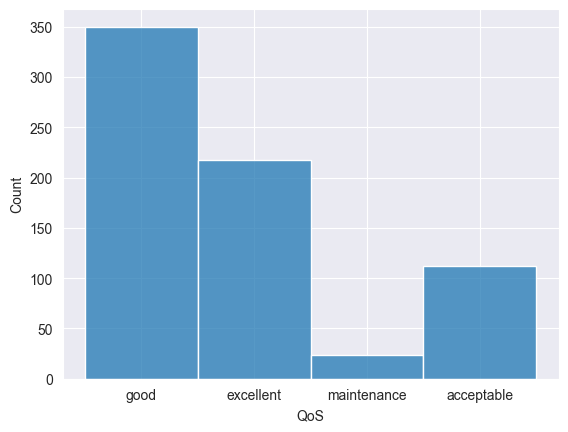

In [401]:
sns.histplot(station_df['QoS'])

In [402]:
#for exact nums
station_df['QoS'].value_counts()

QoS
good           350
excellent      217
acceptable     112
maintenance     24
Name: count, dtype: int64

In [403]:
station_df['QoS'].isna().sum()

np.int64(0)

In [404]:
#latitude (from both station_df and observation_df)
print (station_df['latitude'].min(), observation_df['latitude'].min())
print (station_df['latitude'].max(), observation_df['latitude'].max())
#the min and the max are both realistic values, from -180 to 180

set(station_df['latitude']) == set(observation_df['latitude'])
#every station is included in observation by latitude

-44.39672 -44.39672
65.84811 65.84811


True

In [405]:
#longitude (from both station_df and observation_df)
print (station_df['longitude'].min(), observation_df['longitude'].min())
print (station_df['longitude'].max(), observation_df['longitude'].max())
#the min and the max are both realistic values, from -180 to 180

set(station_df['longitude']) == set(observation_df['longitude'])
#every station is included by longitude also

#this could be checked with patient -> current location but that needs preprocessing in further steps

-156.47432 -156.47432
171.25364 171.25364


True

In [406]:
#Code (station_df)
station_df['code'].value_counts()

code
US    94
IN    51
RU    50
DE    41
BR    36
      ..
HK     1
CF     1
CH     1
KZ     1
AT     1
Name: count, Length: 98, dtype: int64

<Axes: xlabel='code', ylabel='count'>

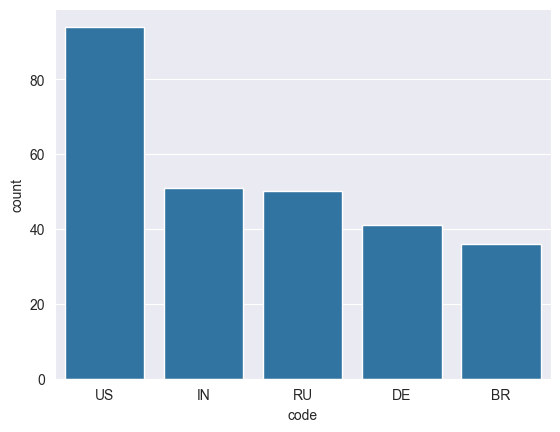

In [407]:
#top 5
top5 = station_df['code'].value_counts().head(5).reset_index()
top5.columns = ['code', 'count']

sns.barplot(x='code', y='count', data=top5)

In [408]:
#Blood group (patient_df)
patient_df['blood_group'].unique().tolist()
#All blood groups are represented

['B-', 'A-', 'O-', 'B+', 'AB-', 'A+', 'AB+', 'O+']

<Axes: xlabel='blood_group', ylabel='Count'>

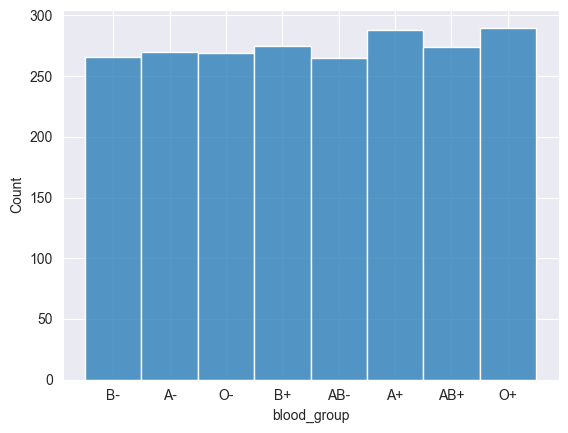

In [409]:
sns.histplot(patient_df['blood_group'])
#not that big of a range

In [410]:
patient_df['blood_group'].value_counts()

blood_group
O+     290
A+     288
B+     275
AB+    274
A-     270
O-     269
B-     266
AB-    265
Name: count, dtype: int64

In [411]:
patient_df['blood_group'].isna().sum()
#great

np.int64(0)

<Axes: ylabel='SpO₂'>

/Users/kazimir/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  func(*args, **kwargs)
/Users/kazimir/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


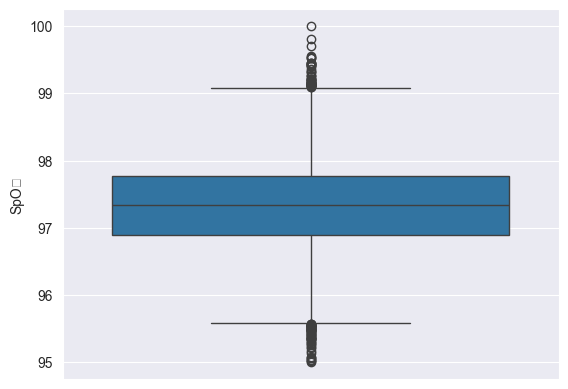

In [412]:
# SpO2
sns.boxplot(y = observation_df['SpO₂'])

In [413]:
#just to have the exact range
observation_df['SpO₂'].min(), observation_df['SpO₂'].max()
#realistic values

(np.float64(95.0), np.float64(100.0))

<Axes: xlabel='SpO₂', ylabel='Count'>

/Users/kazimir/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  func(*args, **kwargs)
/Users/kazimir/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


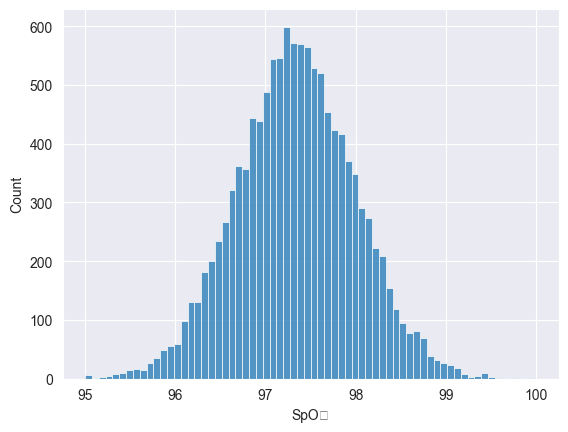

In [414]:
sns.histplot(observation_df['SpO₂'])
#normal distribution

<Axes: xlabel='Hb level', ylabel='Count'>

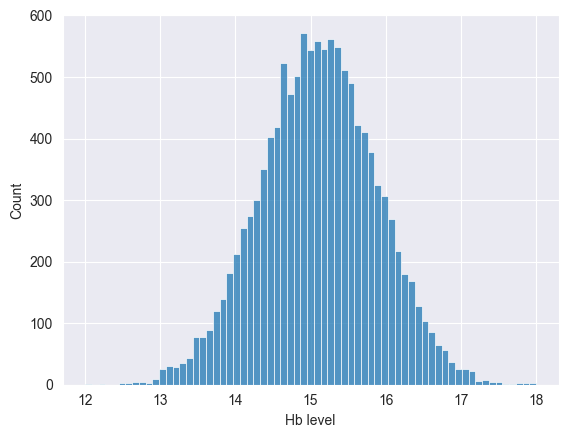

In [415]:
#Hemoglobin (Observation_df)
sns.histplot(observation_df['Hb level'])
#pretty normal, realistic values

<Axes: ylabel='Hb level'>

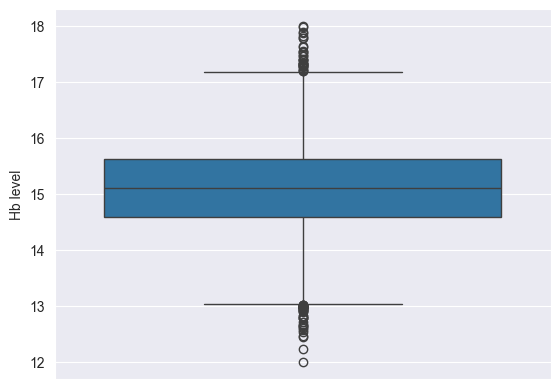

In [416]:
sns.boxplot(y = observation_df['Hb level'])

In [417]:
#exact range
observation_df['Hb level'].min(), observation_df['Hb level'].max()

(np.float64(12.0), np.float64(18.0))

<Axes: xlabel='FiO₂', ylabel='Count'>

/Users/kazimir/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  func(*args, **kwargs)
/Users/kazimir/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


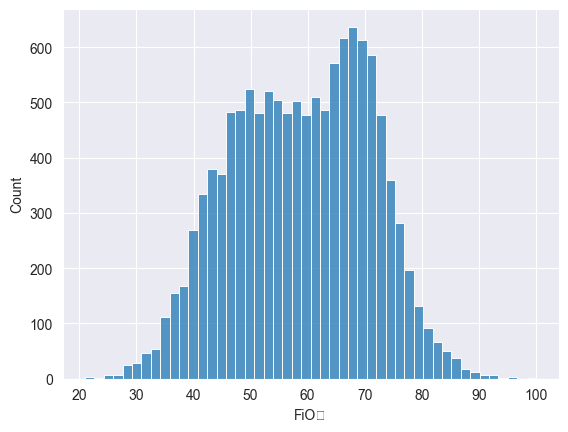

In [418]:
#Fio (Observation_df)
sns.histplot(observation_df['FiO₂'])
#not that normal, slight skew to the right at the peak
#also values are not realistic for common people, probably on oxygen therapy or something

<Axes: ylabel='FiO₂'>

/Users/kazimir/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  func(*args, **kwargs)
/Users/kazimir/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


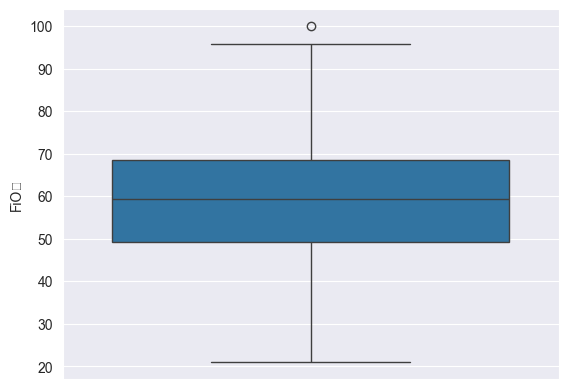

In [419]:
sns.boxplot(observation_df['FiO₂'])

<Axes: xlabel='BP', ylabel='Count'>

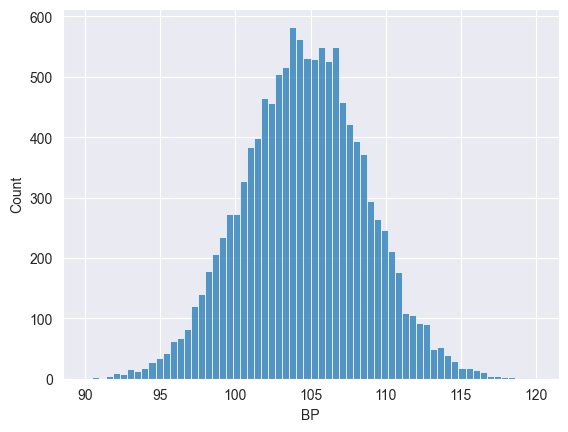

In [420]:
#blood pressure (observation_df)
sns.histplot(observation_df['BP'])
#normal distribution with usual values

<Axes: ylabel='BP'>

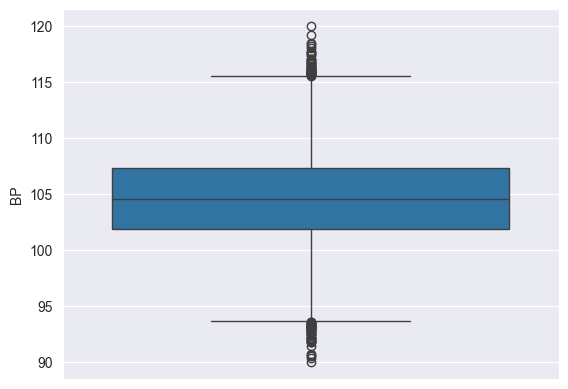

In [421]:
sns.boxplot(y = observation_df['BP'])

In [422]:
observation_df['BP'].min(), observation_df['BP'].max()

(np.float64(90.0), np.float64(120.0))

<Axes: xlabel='HR', ylabel='Count'>

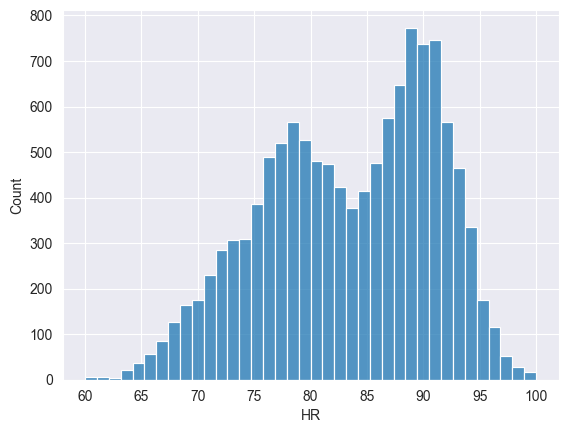

In [423]:
#Heart rate
sns.histplot(observation_df['HR'])
#pretty bimodal, but realistic values

<Axes: ylabel='HR'>

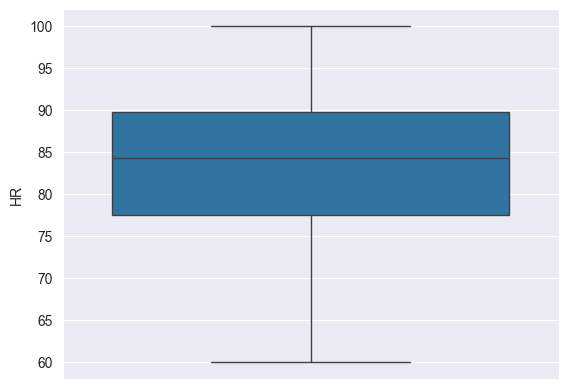

In [424]:
sns.boxplot(y = observation_df['HR'])

<Axes: xlabel='EtCO₂', ylabel='Count'>

/Users/kazimir/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  func(*args, **kwargs)
/Users/kazimir/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


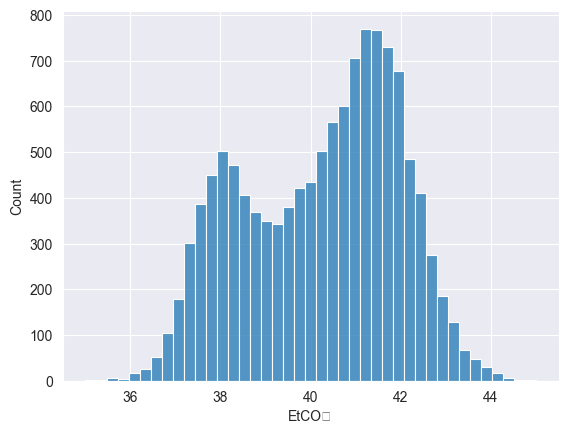

In [425]:
#ETCO2
sns.histplot(observation_df['EtCO₂'])
#also bimodal

<Axes: ylabel='EtCO₂'>

/Users/kazimir/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  func(*args, **kwargs)
/Users/kazimir/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


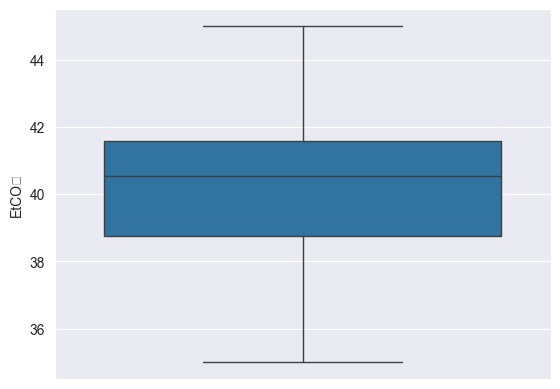

In [426]:
sns.boxplot(observation_df['EtCO₂'])

In [427]:
observation_df['EtCO₂'].min(), observation_df['EtCO₂'].max()
#also usual values

(np.float64(35.0), np.float64(45.0))

In [428]:
#just checking if this is relevant
patient_df['company'].nunique(), patient_df.shape
#too many unique vals, irrelevant

(1989, (2197, 13))

## C) Párová analýza dát: Identifikujte vzťahy a závislostí medzi dvojicami atribútov.

But first lets create a dataset with merged tables with only the attributes we consider as necessary


### Creation of the joined df

In [429]:
#This is a list of attributes that will make up the new merged dataset

#QoS might be of significance with Fio and other atts,
#some codes may also have a touch (for example US station are healthier... idk)
#latitude and longitude will be kept for potentional current location (patient_df) relation
station_attributes = ['QoS', 'code', 'latitude', 'longitude', ]

#current location has been mentioned in station atts, may be dropped -> later comment : it was dropped
#blood group may be relevant, may be not we will see
#user id just so we have some unique user identifier since we are dropping name and everything
patient_attributes = ['user_id', 'blood_group', 'station_ID']

#everything apart from longitude and latitude since that is already kept from station_attributes and we mentioned before that all stations are mentioned in obs_df
observation_attributes = ['SpO₂', 'HR', 'PI', 'RR', 'EtCO₂', 'FiO₂', 'PRV', 'BP',
       'Skin Temperature', 'Motion/Activity index', 'PVI', 'Hb level', 'SV',
       'CO', 'Blood Flow Index', 'PPG waveform features',
       'Signal Quality Index', 'Respiratory effort', 'O₂ extraction ratio',
       'SNR', 'oximetry']

#for check, lets count the atts
len(station_attributes) + len(patient_attributes) + len(observation_attributes)

28

In [430]:
station_df2 = station_df[station_attributes].copy()
patient_df2 = patient_df[patient_attributes].copy()
observation_df2 = observation_df[observation_attributes + ['latitude', 'longitude']].copy()
#this is needed to convert the ID into a normal attribute
station_df2 = station_df2.reset_index().rename(columns={'index': 'station_ID'})

In [431]:
observation_df.shape

(12177, 23)

In [432]:
df_obs_stat = observation_df2.merge(
    station_df2,
    left_on=['latitude', 'longitude'],   # from merged patiens
    right_on=['latitude', 'longitude'],  # from observation_df
    how='inner'
)


In [433]:
#the shape should be the same as observation_df.shape
df_obs_stat.shape
#it is not because in the following cell we can see that some stations have the same coordinates

(21385, 26)

In [434]:
station_df2[['latitude', 'longitude']].duplicated().sum()

np.int64(205)

In [435]:
df_obs_stat.head(5)

,SpO₂,HR,PI,RR,EtCO₂,FiO₂,PRV,BP,Skin Temperature,Motion/Activity index,...,Signal Quality Index,Respiratory effort,O₂ extraction ratio,SNR,oximetry,latitude,longitude,station_ID,QoS,code
0,97.538229,87.194745,11.225419,14.812012,42.113735,33.852538,144.504405,100.455727,35.961920,10.302567,...,42.399816,46.497869,0.289012,39.334620,1.0,49.183239,15.454273,403,good,CZ
1,97.933271,80.787303,11.730935,14.964972,39.537692,65.326035,110.615787,102.133386,36.274352,8.975704,...,46.078137,53.351208,0.290879,26.006709,0.0,33.544280,-84.233810,4,good,US
2,97.933271,80.787303,11.730935,14.964972,39.537692,65.326035,110.615787,102.133386,36.274352,8.975704,...,46.078137,53.351208,0.290879,26.006709,0.0,33.544280,-84.233810,426,excellent,US
3,98.209983,79.733895,12.839449,14.840668,39.758706,53.925230,107.208040,104.036654,35.583851,7.653790,...,41.525607,52.124182,0.263171,31.890829,1.0,-27.505780,153.102360,219,excellent,AU
4,98.202790,86.156903,11.204152,14.523288,43.448577,35.227704,143.282224,105.723603,36.463180,8.795732,...,36.535021,50.342830,0.256780,30.721375,1.0,37.656390,126.835000,319,excellent,KR


In [436]:
#now we need to join the df_obs_stat with patient_df
df = df_obs_stat.merge(
    patient_df2,
    left_on=['station_ID'],
    right_on=['station_ID'],
    how='inner'
)

In [437]:
df.shape
#now we have many more entries since there are many patients sharing the same station as we can see in the next cell

(66973, 28)

In [438]:
patient_df2[['station_ID']].duplicated().sum()

np.int64(1520)

In [439]:
df.columns

Index(['SpO₂', 'HR', 'PI', 'RR', 'EtCO₂', 'FiO₂', 'PRV', 'BP',
       'Skin Temperature', 'Motion/Activity index', 'PVI', 'Hb level', 'SV',
       'CO', 'Blood Flow Index', 'PPG waveform features',
       'Signal Quality Index', 'Respiratory effort', 'O₂ extraction ratio',
       'SNR', 'oximetry', 'latitude', 'longitude', 'station_ID', 'QoS', 'code',
       'user_id', 'blood_group'],
      dtype='object')

### correlation matrix with heatmap

In [440]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_df.corr().round(2)

/Users/kazimir/Library/Python/3.9/lib/python/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.draw()
/Users/kazimir/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


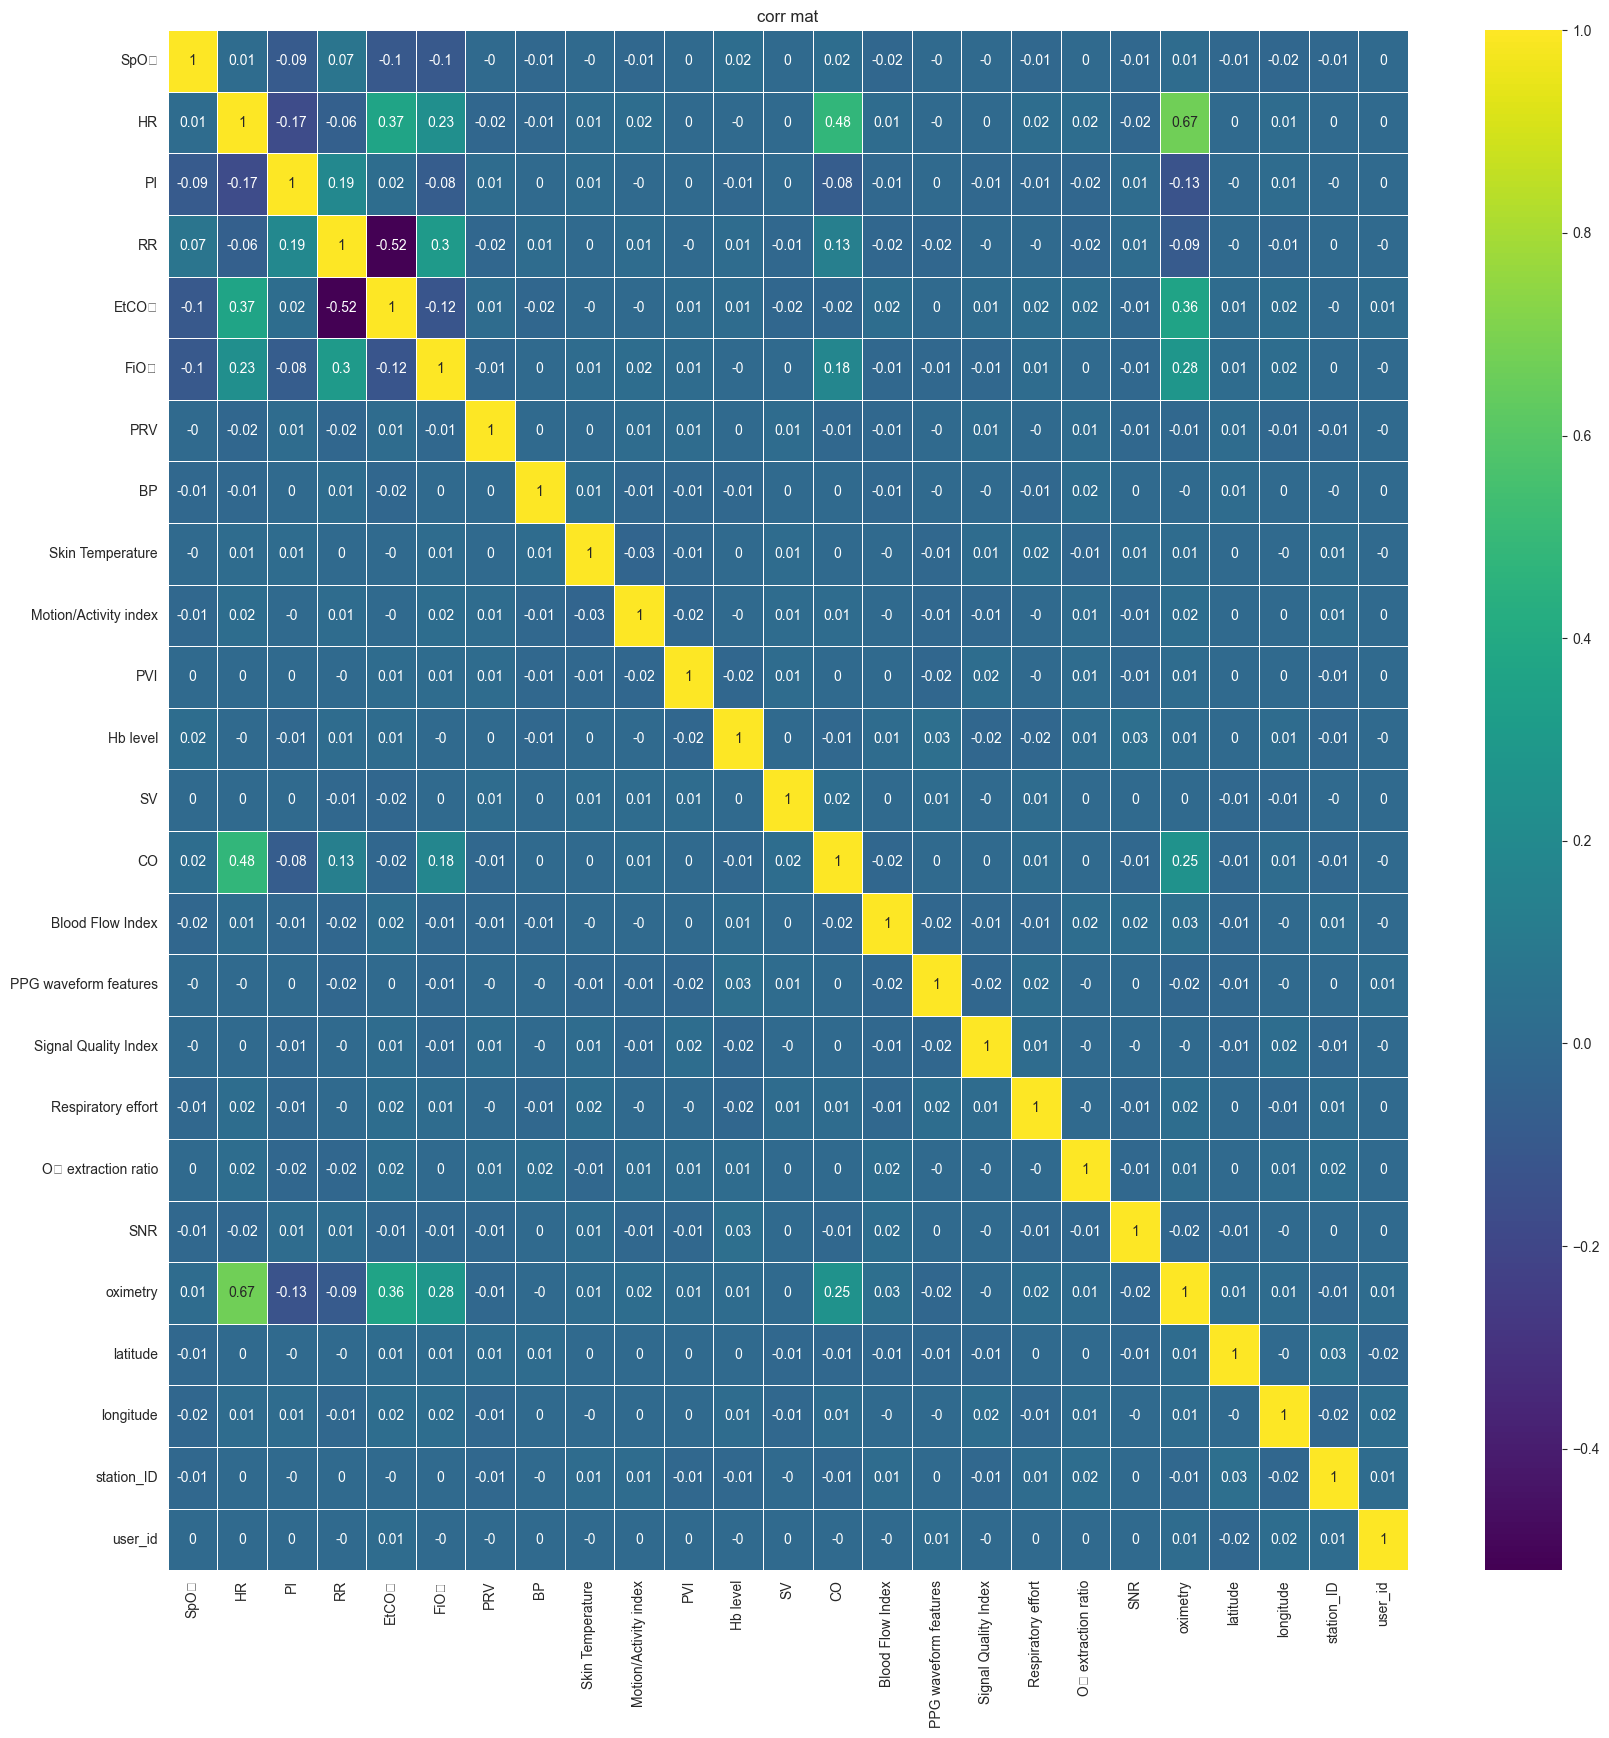

In [441]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap='viridis', annot=True,linewidths=0.5)
plt.title("corr mat")
plt.show()

In [442]:
#based on this heatmap lets write out all the correlations so we can take a look at them later
#I only included minimum 0,2 corr

#GROUP 1 (WITHOUT OXIMETRY):            -- used in this step

#HR - EtCO2(weak), FiO2(weak), CO(mid)
#RR - Etco2(mid), FiO2(weak),

#Group 2(OXIMETRY):
#OX - HR(strong),EtCO2(weak) ,FiO2(weak), CO(weak)      -- used in 1D

### solution for 1.1C)
here are the comparisons between the attributes we got from the correlation heatmap

<Axes: xlabel='HR', ylabel='EtCO₂'>

/Users/kazimir/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  func(*args, **kwargs)
/Users/kazimir/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


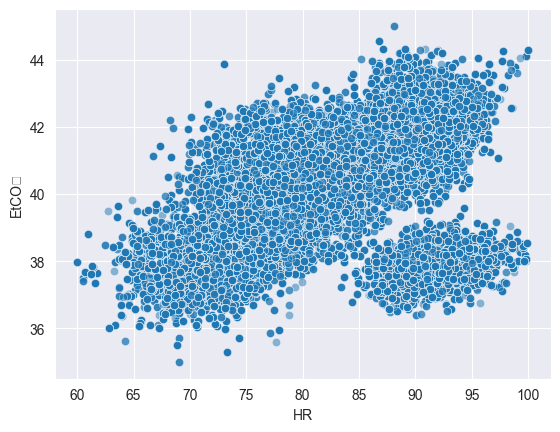

In [443]:
#HR-EtCO2
sns.scatterplot(data=df, x='HR', y='EtCO₂', alpha=0.5)

<Axes: xlabel='HR', ylabel='EtCO₂'>

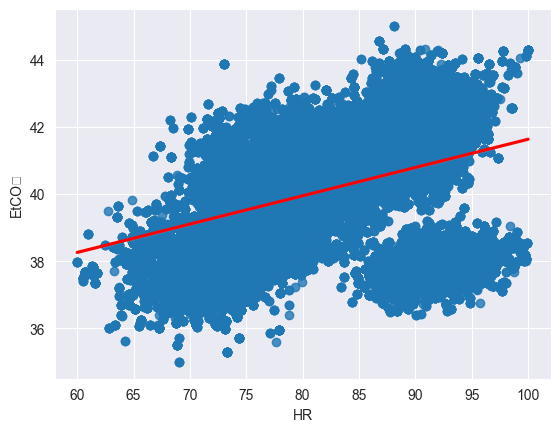

In [444]:
sns.regplot(data=df, x='HR', y='EtCO₂', line_kws={'color':'red'})

In [445]:
#this is not enough to determine that these two variables correlate, maybe without the cluster around [92.5 , 38]

<Axes: xlabel='HR', ylabel='FiO₂'>

/Users/kazimir/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  func(*args, **kwargs)
/Users/kazimir/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


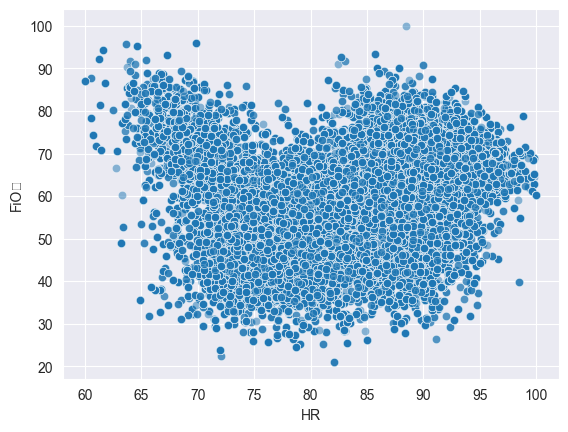

In [446]:
#HR-FiO2
sns.scatterplot(data=df, x='HR', y='FiO₂', alpha=0.5)

In [447]:
#way too spread out, insignificant

<Axes: xlabel='HR', ylabel='CO'>

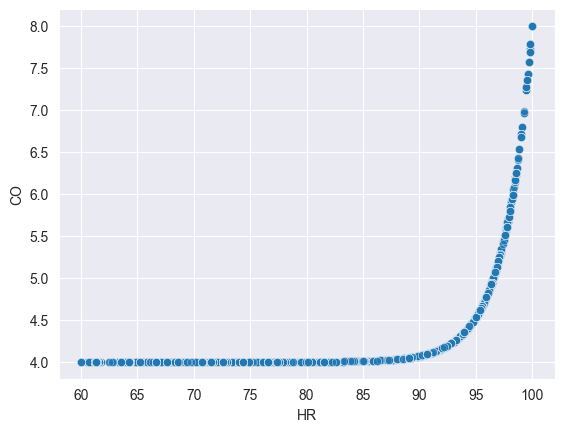

In [448]:
#HR-CO
sns.scatterplot(data=df, x='HR', y='CO', alpha=0.5)


In [449]:
#This is definitely a significant correlation, but not linear since CO values are cut off at 4.0

<Axes: xlabel='RR', ylabel='EtCO₂'>

/Users/kazimir/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  func(*args, **kwargs)
/Users/kazimir/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


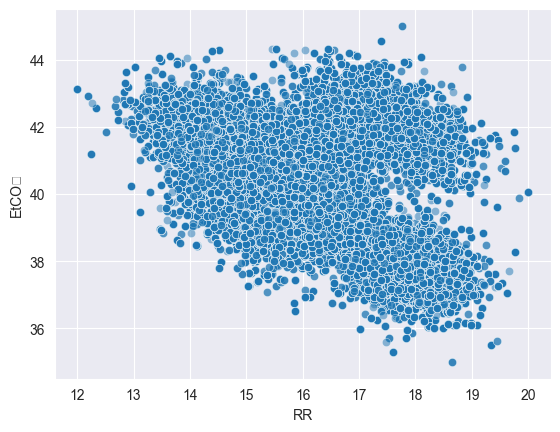

In [450]:
#RR - Etco2
sns.scatterplot(data=df, x='RR', y='EtCO₂', alpha=0.5)

In [451]:
#slight show of negative correlation, but ruined by the upper right cluster

<Axes: xlabel='RR', ylabel='FiO₂'>

/Users/kazimir/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  func(*args, **kwargs)
/Users/kazimir/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


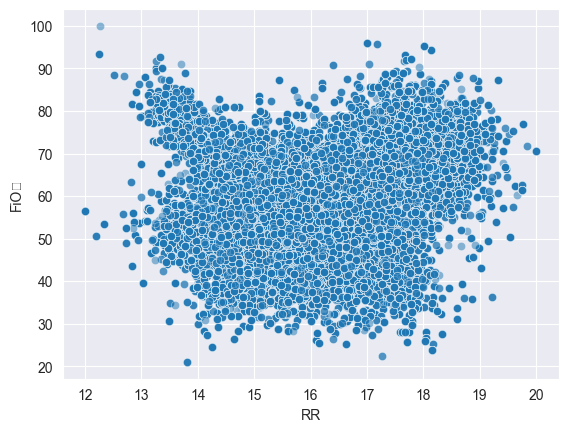

In [452]:
#RR FiO2
sns.scatterplot(data=df, x='RR', y='FiO₂', alpha=0.5)

In [453]:
#no correlation

these were only the numeric attributes we took from the heatmap, now lets take at look at non numeric correlations aswell

In [454]:
non_numeric = df.select_dtypes(exclude=['float64', 'int64']).columns
print(non_numeric)
#these will be tested for correlation with CO,FIO2 and EtCO2 since these seem to be the most important attributes

Index(['QoS', 'code', 'blood_group'], dtype='object')


/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_1440/2636408951.py:13: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/kazimir/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


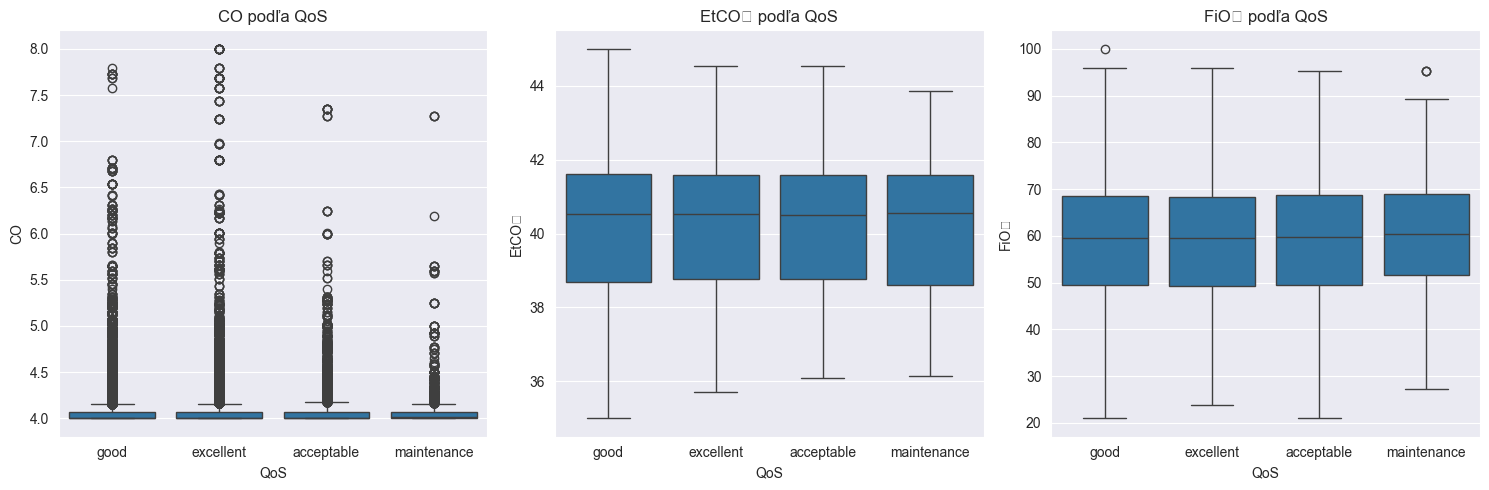

In [464]:
#QoS
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(data=df, x='QoS', y='CO', ax=axes[0])
sns.boxplot(data=df, x='QoS', y='EtCO₂', ax=axes[1])
sns.boxplot(data=df, x='QoS', y='FiO₂', ax=axes[2])

plt.tight_layout()
plt.show()
#no real significance

/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_1440/1338139518.py:8: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/kazimir/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


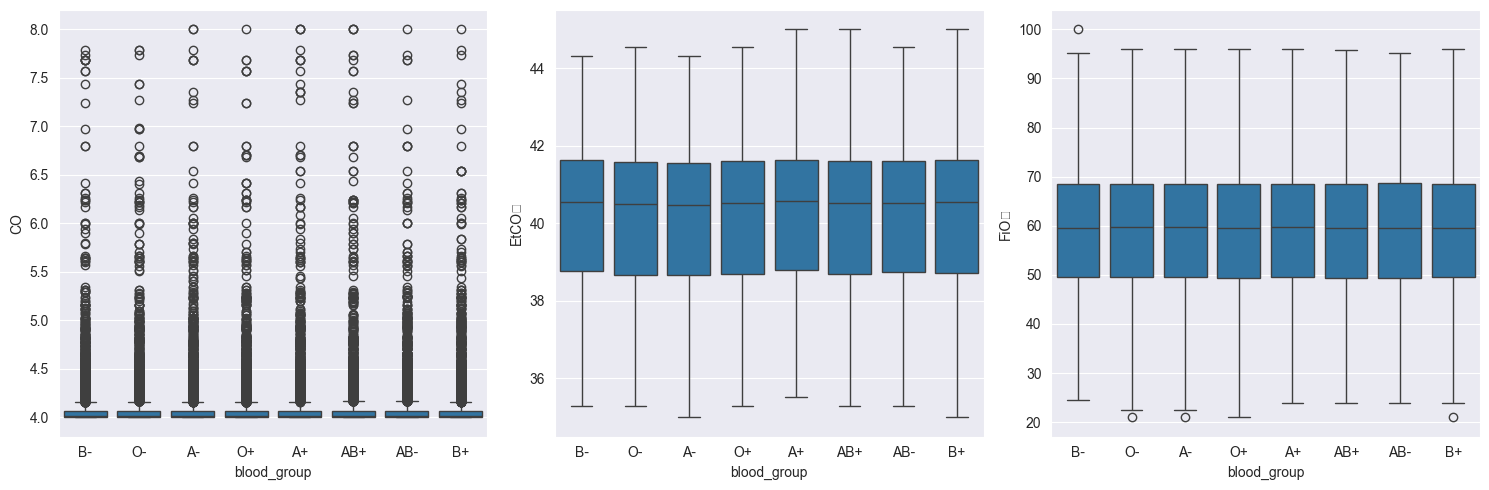

In [466]:
#QoS
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(data=df, x='blood_group', y='CO', ax=axes[0])
sns.boxplot(data=df, x='blood_group', y='EtCO₂', ax=axes[1])
sns.boxplot(data=df, x='blood_group', y='FiO₂', ax=axes[2])

plt.tight_layout()
plt.show()

/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_1440/2968286196.py:12: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/kazimir/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


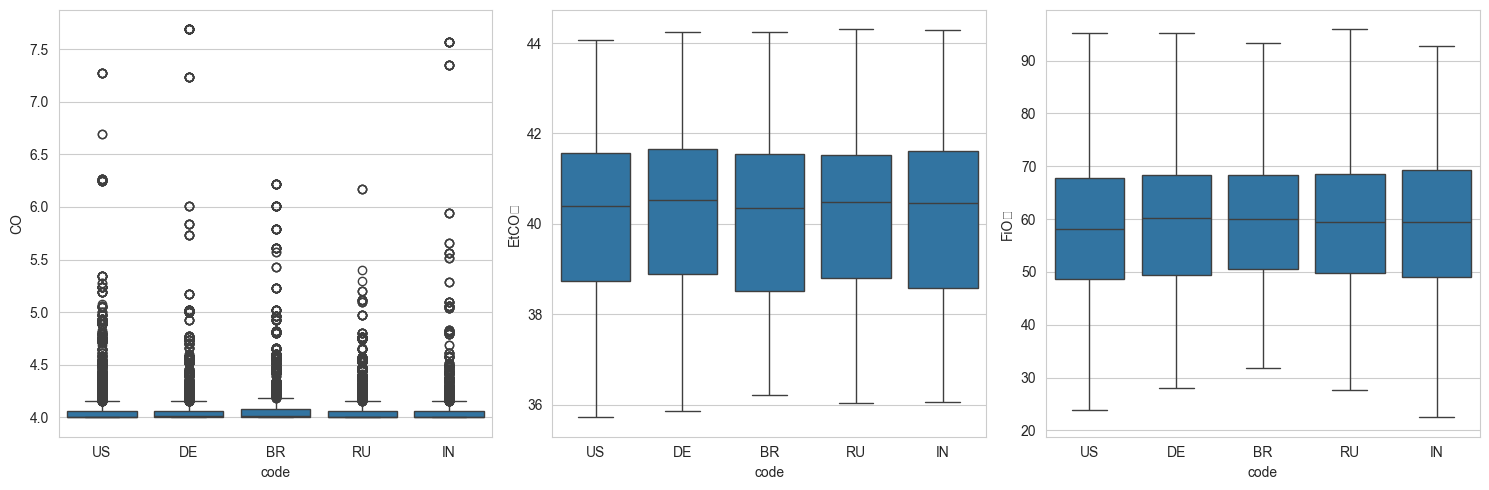

In [468]:
#code - top 5
top_codes = df['code'].value_counts().head(5).index
filtered_df = df[df['code'].isin(top_codes)]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(data=filtered_df, x='code', y='CO', ax=axes[0])
sns.boxplot(data=filtered_df, x='code', y='EtCO₂', ax=axes[1])
sns.boxplot(data=filtered_df, x='code', y='FiO₂', ax=axes[2])

plt.tight_layout()
plt.show()

## D)Párová analýza dát: Identifikujte závislosti medzi predikovanou premennou a ostatnými premennými (potenciálnymi prediktormi)

from the correlation heatmap we have these attributes that seem to have some correlation with the predicted attribute

HR(strong),EtCO2(weak) ,FiO2(weak), CO(weak)

/var/folders/6k/55x7y0s91md2mx43cw14fll80000gn/T/ipykernel_1440/1493642813.py:8: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/kazimir/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


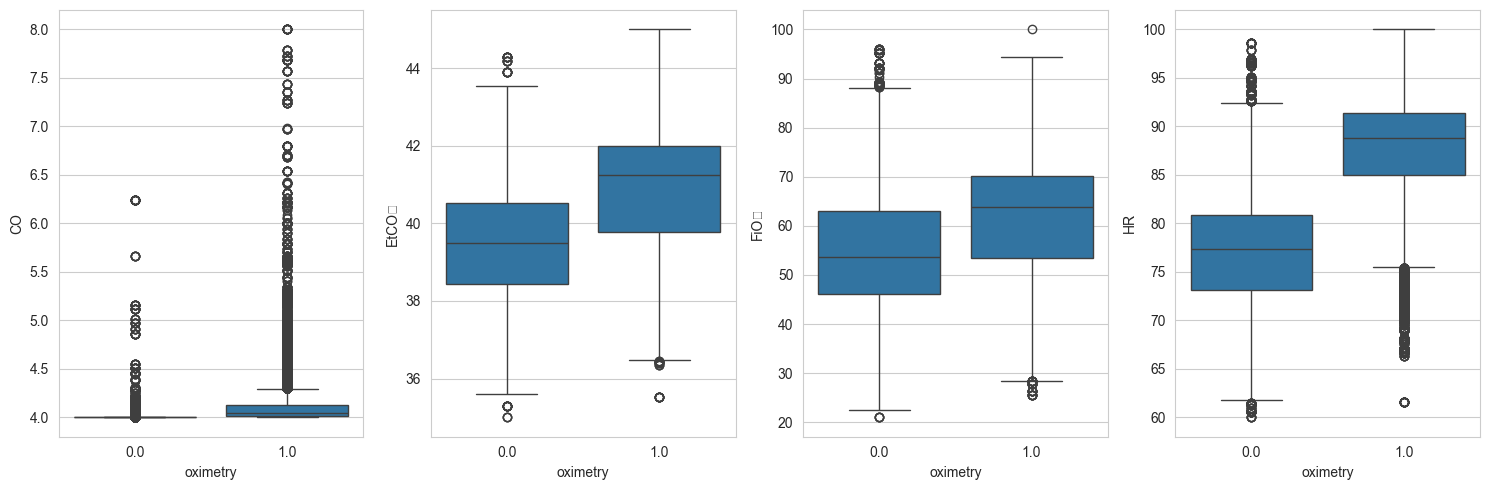

In [471]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

sns.boxplot(data=df, x='oximetry', y='CO', ax=axes[0])
sns.boxplot(data=df, x='oximetry', y='EtCO₂', ax=axes[1])
sns.boxplot(data=df, x='oximetry', y='FiO₂', ax=axes[2])
sns.boxplot(data=df, x='oximetry', y='HR', ax=axes[3])

plt.tight_layout()
plt.show()

In [ ]:
#CO is hard to determine, the IQRs are close but the outliers may mean a lot (will probably see more after normalization), the EtCO2 and FiO2 seem to be higher when oximetry is set to 1, HR seems to have a really significant correlation with oximetry, as suggested by the correlation heatmap

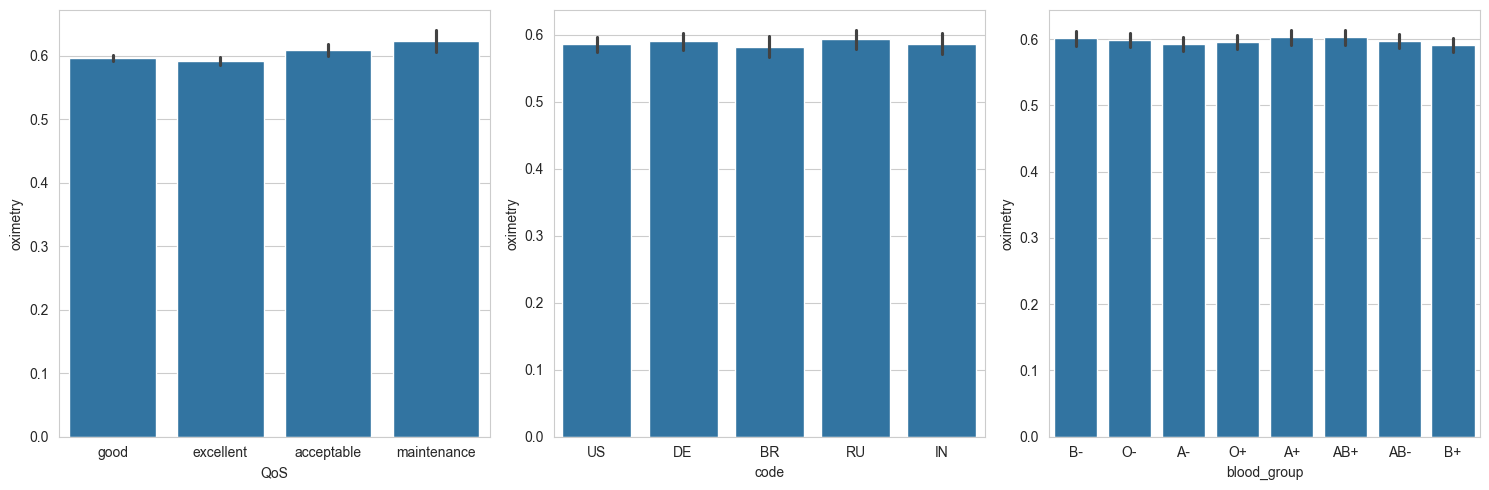

In [479]:
#correlation with non numerical values
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# QoS
sns.barplot(ax=axes[0], x=df['QoS'], y=df['oximetry'])
# code (top 5)
top5 = df['code'].value_counts().head(5).index
sns.barplot(ax=axes[1], x=df[df['code'].isin(top5)]['code'], y=df[df['code'].isin(top5)]['oximetry'])
# blood_group
sns.barplot(ax=axes[2], x=df['blood_group'], y=df['oximetry'])

plt.tight_layout()
plt.show()


In [ ]:
#this graphs show the oximetry 1/0 ratio per each QoS, Code and blood group. So rather than correlation, this shows that the data are evenly distributed

## E) Findings, thought ect.

all of our thoughs and findings are thoroughly documented throughout the operations, but here is the summary:

Firstly we analysed each table and gave a quick look for every attribute, for dataset station, we used the coordinations to merge it with observation_df, we ended up not using the station name as it is insignificant as well as revision. The only missing values were 2 codes which will probably be filled later with a newly created code. The patient dataframe is full of insignificant attributes, we end up only using the blood group and station ID for merge with station df. From observation we keep every value, although some seem to be more signicicant than others, for example FiO2, CO,RR, EtCO2. We take some time to look at individual distributions of attributes in B), but we dont really find any abnormalities that would pose a threat to our models precition, most distributions are either normal or bimodal or uniform. In C) we needed to take a look at correlation between the attributes, so we needed to create a correlation heatmap which was created from a joint dataframe consisting of all three datasets, but only the attributes that we deemed as important. We discarded the useless features and we will not work with them from that point onward. However we find out minor correlation between HR and EtCO2 as well as a negative one between HR and FiO2 and a RR and EtCO2. HR and CO seem to have a strong positive correlation but since CO is capped at 4.0, it is not shown that nicely. In D) we see that the predicted value oximetry strongly correlates with HR, and FiO2 and EtCO2 also show medium signs of correlation. Correlation with CO is harder to determine without normalising the data first.